# Visualizing Correlation




## In this section

In this section we will discuss:

- Making scatterplots from a .csv file using the matplotlib library
- Adjusting matplotlib's default scatterplots to make them clearer and more informative
- Plotting the the regression line for  a linear regression using the statsmodels library onto our regression
- Extracting R<sup>2</sup> and p values from a statsmodel linear regression and plotting them
- Plotting 95% confidence intervals and 95% prediction intervals on the plot
- The meaning of confidence intervals vs. prediction intervals
- Adding label legends

## Prerequisites

- Familiar with running python in Jupyter notebooks
- Have Anaconda python installed
- Familiar with basic python data types (list)
- Basic familiarity with pandas DataFrames
- Basic familiarity with matplotlib
- Basic familiarity with the concept of linear regression

## Table of Content

[TODO]

## Overview

Correlation is one of the most common patterns that needs to be represented in bioinformatics. While there are some types of data, like paired data –  pretreatment and posttreatment measurements from each of 10 mice, for instance — that may have special considerations, many types of correlation can be conveyed in a simple scatterplot. Often such plots combine both the raw data itself, as well as some sort of statistical regression model fit to the data. Some may additionally layer in pictographs (images of different species in an analysis, for example), label key data points, or 
indicate summary statistics right on the graph.

In this section, we will focus on implementing a publication-ready scatterplot in matplotlib that incorporates several of these features. 

While basic graphs can be produced very quickly, more complex publication- or presentation- ready graphs generally require some degree of manual adjustment in order to achieve best results.

## A simple scatterplot in matplotlib

In order to generate a scatterplot in matplotlib, the bare minimum we need are two lists of data - one for the x values and one for the y-values. One common way of getting these is to load a `.csv` or comma-separated values file (which itself can be output from Microsoft Excel or Google Sheets) as a pandas `DataFrame` object. We can then select the x-column, convert it to a list, and save it to an `x_values` variable. If we repeat that for the variable we want to plot on the y-axis, we then have all the information we need for a basic scatter plot


Text(0, 0.5, 'Predation Success')

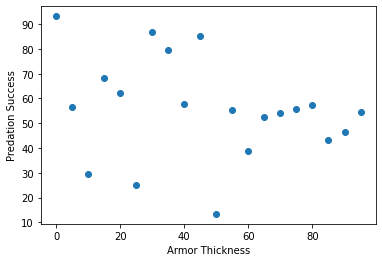

In [219]:
#Import pandas, which will let us use a DataFrame to handle our tabular data.
import pandas as pd

#Import matplotlib, which will let us plot the data
import matplotlib.pyplot as plt

#Load the data
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

#Extract x and y data
x_data = list(df['armor_thickness'])
y_data = list(df['predation_success'])

#Make the scatterplot
plt.scatter(x_data,y_data)

#(You can run the code at this point to see the graph)


#Optional - Label the axes
plt.xlabel('Armor Thickness')
plt.ylabel('Predation Success')

This chart isn't especially pretty, but is good enough that we can at least see what's going on. You may notice that there are no units on the axes. Before we showed the plot to someone else, it would be a good idea to include these so the scale of the graph is clear. The correct units in this case are millimeters (mm) for shell thickness and percentage (`%`) for predation success. You make this fix by adjusting the strings passed to the xlabel and ylabel functions in the above code.

**Try it yourself**: adjust the x and y labels so that the units are show. Let's show `%` (short for percentage) for the y-axis and `mm` (millimeters) for the x-axis. 

Now that the graph meets a basic standard of clarity, let's take a moment and consider what it might mean.

**Stop and consider**. Based on what we've shown so far, do you think armor thickness affects predation success? How confident are you? For example, based on this graph, are you  totally sure armor matters, unsure, totally sure it doesn't?.

For me, just looking at this plot I'm not really sure how much I should believe these factors to be related to one another - I can sort of squint and see a downward trend, but it is hard for me to estimate visually if I would see similar trends in random data. So I would be firmly in the unsure camp. This is a situation in which statistical analysis can be very useful - it can help us to quantify roughly how unsure we should be.

Let's try using linear regression to fit a line through these data, and draw the result onto our chart. For completeness, let's repeat all the code from before, and just add in the new analysis.

## A scatterplot with inferred linear regression line in matplotlib

We can use the `ols` function in statsmodels.py to perform Ordinary Least Squares regression on our data. This will find the model parameters (meaning the slope(s) and intercept) that minimize the sum of squared errors from our model in the data. Basically, this just picks a slope and intercept that cause the regression line that matches the bulk of our data points as much as possible.

To add a regression line to our plot, we have to do two main things, in addition to what we did before:

1) Fit the regression model using statsmodels
2) Extract the predictions of that model into a list that we can plot
3) Plot a line on top of the scatterplot that reflects the model predictions



                            OLS Regression Results                            
Dep. Variable:      predation_success   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     19.69
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           0.000318
Time:                        16:58:18   Log-Likelihood:                -77.710
No. Observations:                  20   AIC:                             159.4
Df Residuals:                      18   BIC:                             161.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          83.1754      5.352     

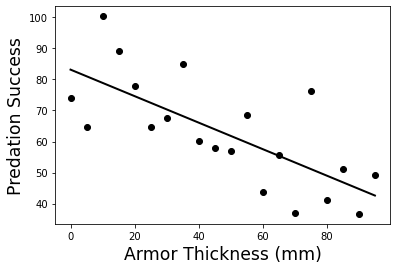

In [224]:
import pandas as pd
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

## Add a regression line
import statsmodels.formula.api as smf
formula = "predation_success ~ armor_thickness"
model = smf.ols(formula,data=df)
model_fit = model.fit()

#Plot the raw data
plt.scatter(x_data,y_data,marker='o',color='black')

#Plot the model predictions
plt.plot(x_data,model_fit.fittedvalues,label=f"Regression line ({formula})",color="black",linewidth=2)

#Set labels
plt.xlabel("Armor Thickness (mm)",size="xx-large")
plt.ylabel("Predation Success",size="xx-large")

#Print summary results
print(model_fit.summary())

**Stop and consider**: using the regression results up above, how does your impression of the relationship between armor thickness and predation success change? Or does it stay about the same?

*Hint*: you can look at the coef. values next to each variable to see what value OLS found for the intercept and the slope. The p-values next to each variable indicate significance, with p < 0.05 typically taken as a threshold for significance. 

## Adding confidence and prediction intervals to our graph

Usually, when we do a linear regression on different datasets, we get slightly different results *even if the underlying process is the same*.
Therefore, it can be useful to calculate a **95% confidence interval of the mean** for the regression that describes this uncertainty. This interval describes the range within which the mean y-value for any given x-value will fall 95% of the time, if the model assumptions are correct. 

Another related measure is the **95% prediction interval**. For each x value, this is the range on the y-axis within which a new data point will fall 95% of the time, if the model is correct. 

The 95% prediction interval will be larger than the 95% confidence interval, since the mean — by virtue of being an average — is more stable and predictable than individual data points predicted by the model.

It's important to note that to obtain a 95% confidence interval, we can only allow 2.5% of the data to be above our predicted range, and 2.5% below it (thus summing to 5% error in total). Therefore, perhaps counter-intuitively, to find these intervals we have to find values within the 2.5% - 97.5% percentiles.

Text(0, 0.5, 'Predation Success')

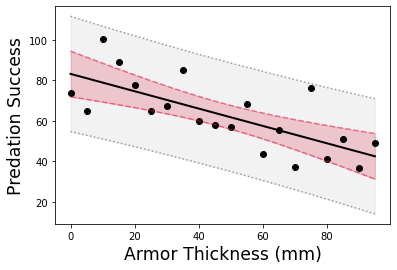

In [232]:
import pandas as pd
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

## Add a regression line
import statsmodels.formula.api as smf
formula = "predation_success ~ armor_thickness"
model = smf.ols(formula,data=df)
model_fit = model.fit()
prediction = model_fit.get_prediction()
model_prediction_df = prediction.summary_frame()

#Set up subplots
fig,ax = plt.subplots()

#Plot a shaded area for the 95% confidence interval of observations
#95% of y values for a given x value should fall within this range
#Shade in the outermost confidence interval first, as it will be on bottom
lower_obs_ci = model_prediction_df["obs_ci_lower"]
upper_obs_ci = model_prediction_df["obs_ci_upper"]
plt.fill_between(x_data,lower_obs_ci,upper_obs_ci,alpha=0.1,color='grey')
plt.plot(x_data,lower_obs_ci,alpha=0.75,marker=None,linestyle='dotted',color='grey',label="95% Confidence Interval of Observations")
plt.plot(x_data,upper_obs_ci,alpha=0.75,marker=None,linestyle='dotted', color='grey')

#Plot a shaded area for the 95% confidence interval of the regression
#the true regression line (if the model is correct) should fall within this area 95% of the time
lower_ci = model_prediction_df["mean_ci_lower"]
upper_ci = model_prediction_df["mean_ci_upper"]
plt.fill_between(x_data,lower_ci,upper_ci,alpha=0.2,color='crimson')
plt.plot(x_data,lower_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson',label="95% Confidence Interval of Mean")
plt.plot(x_data,upper_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson')

#Plot the mean predicted values
plt.plot(x_data,model_fit.fittedvalues,label=f"Regression line ({formula})",color="black",linewidth=2)

#Finally plot the raw data in black
plt.scatter(x_data,y_data,marker='o',color='black')


#Set labels
plt.xlabel("Armor Thickness (mm)",size="xx-large")
plt.ylabel("Predation Success",size="xx-large")

## Polishing our chart

The next block of code adds some niceties to our chart. You can steal elements from it to use in your own charts.
For example, we'll extract R2 and p values from our statistical results and plot them onto the chart.

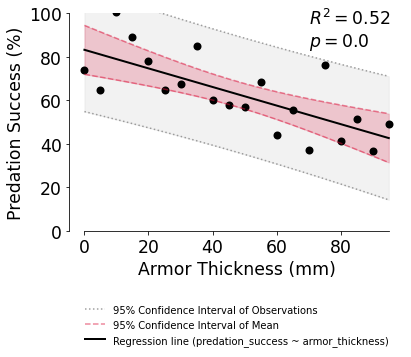

In [231]:
import pandas as pd
df = pd.read_csv('./resources/armor_thickness_vs_predation.csv')

## Add a regression line
import statsmodels.formula.api as smf
formula = "predation_success ~ armor_thickness"
model = smf.ols(formula,data=df)
model_fit = model.fit()
prediction = model_fit.get_prediction()
model_prediction_df = prediction.summary_frame()

#Set up subplots
fig,ax = plt.subplots()

#Plot a shaded area for the 95% prediction interval
#95% of future observed y values for a given x value should fall within this range
#Shade in the outermost confidence interval first, as it will be on bottom
lower_obs_ci = model_prediction_df["obs_ci_lower"]
upper_obs_ci = model_prediction_df["obs_ci_upper"]
plt.fill_between(x_data,lower_obs_ci,upper_obs_ci,alpha=0.1,color='grey')

#Add dotted lines to the edges of the 95% prediction interval
plt.plot(x_data,lower_obs_ci,alpha=0.75,marker=None,linestyle='dotted',color='grey',label="95% Confidence Interval of Observations")
plt.plot(x_data,upper_obs_ci,alpha=0.75,marker=None,linestyle='dotted', color='grey')

#Plot a shaded area for the 95% confidence interval of the regression
#the true regression line (if the model is correct) should fall within this area 95% of the time
lower_ci = model_prediction_df["mean_ci_lower"]
upper_ci = model_prediction_df["mean_ci_upper"]
plt.fill_between(x_data,lower_ci,upper_ci,alpha=0.2,color='crimson')

#Add dashed lines to the edges of the 95% confidence interval
plt.plot(x_data,lower_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson',label="95% Confidence Interval of Mean")
plt.plot(x_data,upper_ci,alpha=0.5,marker=None,linestyle='dashed',color='crimson')

#Plot the model fit line using a thick black line
plt.plot(x_data,model_fit.fittedvalues,label=f"Regression line ({formula})",color="black",linewidth=2)

#Plot the data points in black
plt.scatter(x_data,y_data,marker='o',color='black',edgecolor='black',linewidth=2)

#Set labels
plt.xlabel("Armor Thickness (mm)",size="xx-large")
plt.ylabel("Predation Success (%)",size="xx-large")


#Format Axes
plt.ylim(0,100)

#Format ticks
plt.xticks(size="xx-large")
plt.yticks(size="xx-large")

#Set up a legend
plt.legend(loc="upper center",bbox_to_anchor=(0.5,-0.3),frameon=False)

## Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set spine extent.
ax.spines['bottom'].set_bounds(min(x_data), max(x_data))
ax.spines['left'].set_bounds(0,100)

#Extract R2 from model and add to scatterplot
R2 = round(model_fit.rsquared,2)
plt.annotate(xy=(70,95),text=fr'$R^2 = {R2}$',size="xx-large")

p = round(model_fit.f_pvalue,2)
plt.annotate(xy=(70,85),text=fr'$p = {p}$',size="xx-large")

model_prediction_df.head()
plt.savefig("armor_thickness_vs_predation_success.png",dpi=300)

## Exercises

**Exercise 1.** Describe the difference between the 95% confidence interval (that is the confidence interval of the mean), versus the 95% prediction interval (the confidence interval of the predicted y values). 
    
**Exercise 2.** In the code cell below, I have entered the code used to generate the simulated data above. Try generating your own dataset using the code, *but keep the slope, standard deviation of the error, and intercept the same* (-35.0,70.0 and 18.0, respectively). In a momement we will load this new dataset and analyze it. Before you analyze the data, write down an answer to the following questions:
    "Do you think you will infer the same slope and intercept as in the example dataset up above?"

In [223]:
import numpy as np
def linear_simulation(x_data,slope,error_stdev = 20, intercept = 0):
    """Return y data given x data and parameters
    x_data -- a list of x data points (ints or floats)
    slope -- the slope of our linear model (m in y=mx+b+error)
    error_stdev -- the standard deviation of normal error
    intercept -- the intercept of our linear model (b in y=mx+b+error)
    """
    y_predictions = []
    for i,x in enumerate(x_data):
        error = np.random.normal(loc=0.0,scale = error_stdev,size = None)
        y = slope*x + error + intercept 
        y_predictions.append(y)
        
    return y_predictions

x_data = list(range(0,100,5))    
y_data = linear_simulation(x_data = x_data,slope = -0.35,intercept =70.0,error_stdev=18.0)
df = pd.DataFrame()
df["armor_thickness"] = x_data
df["predation_success"] = y_data
df.to_csv('./resources/armor_thickness_vs_predation.csv')

**Exercise 3** Now run the linear_simulation function to generate a new dataset as shown in the code below. Next, perform linear regression of armor thickness against predation success on this new dataset, and record the slope you get. Did the result match your prediction? Did you get the same value as before? If you like, you can repeat this more than once. Do you always get the same inferred slope, or is it different each time?

**Exercise 4** Research the notion of a 95% confidence interval for the mean. If you repeated this analysis 100 times, how often do you expect the inferred prediction line to fall within the 95% confidence interval for the mean in the initial analysis?

## References

## Reading Responses and Feedback